**Auswertung:**



In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s314/20210613-0839/",
            "../checkpoints/s314-no-shared/20210615-1332/",
            "../checkpoints/s314-short/20210616-1357/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                           baseline_rule-based   
ddqn_new                                              0   
lr                                                 0.01   
batch_size                                          128   
lambda_rwd_mstpc                                    0.1   
lambda_rwd_energy                                 5e-06   
energy_cons_in_kWh                                    0   
reward_offset                                       0.0   
clip_econs_at                                       0.0   
soften_instead_of_clipping                            0   
target_network_update_freq                            3   
epsilon_final_step                                  100   
episodes_count                                      100   
agent_init_gain                                     0.8   
use_layer_normalization                               0   
fewer_q_values                                        0   
agent_w_l2                                        1e-05   
network_storage_frequency                            10   
shared_network_per_agent_class                        0   
model                           Building_5ZoneAirCooled   
next_occ_horizont                                     0   

                                                                  s314  \
algorithm                                                         ddqn   
ddqn_new                                                             1   
lr                                                                 0.1   
batch_size                                                         256   
lambda_rwd_mstpc                                                  0.06   
lambda_rwd_energy                                                0.008   
energy_cons_in_kWh                                                   1   
reward_offset                                                      0.3   
clip_econs_at                                                    150.0   
soften_instead_of_clipping                                           1   
target_network_update_freq                                           2   
epsilon_final_step                                               37500   
episodes_count                                                     300   
agent_init_gain                                                    0.7   
use_layer_normalization                                              1   
fewer_q_values                                                       1   
agent_w_l2                                                       1e-06   
network_storage_frequency                                          300   
shared_network_per_agent_class                                       1   
model                           Building_5ZoneAirCooled_SingleSetpoint   
next_occ_horizont                                                    2   

                                                        s314-no-shared  \
algorithm                                                         ddqn   
ddqn_new                                                             1   
lr                                                                 0.1   
batch_size                                                         256   
lambda_rwd_mstpc                                                  0.06   
lambda_rwd_energy                                                0.008   
energy_cons_in_kWh                                                   1   
reward_offset                                                      0.3   
clip_econs_at                                                      0.0   
soften_instead_of_clipping                                           0   
target_network_update_freq                                           2   
epsilon_final_step                                               15625   
episodes_count                                                     125   
agent_init_gain                                                    0.7   
use_layer_nor

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001           s314  \
Number of training episodes                      1.0   37500.000000   
Runtime in s                                     0.0  220936.627620   
Runtime in h                                     0.0      61.371285   
Mean episode runtime in s                        0.0       5.891643   
Mean episode runtime during eval. episode in s   0.0       5.665995   
Mean episode runtime after eval. episode in s    NaN       5.783526   
Mean episode runtime in no eval. episode in s    NaN       5.892398   

                                                s314-no-shared    s314-short  
Number of training episodes                       15625.000000  16000.000000  
Runtime in s                                     160866.297061  92981.645012  
Runtime in h                                         44.685083     25.828235  
Mean episode runtime in s                            10.295443      5.811353  
Mean episode runtime during eval. episode in s       10.336299      5.641133  
Mean episode runtime after eval. episode in s        10.126376      5.729277  
Mean episode runtime in no eval. episode in s        10.295114      5.812693

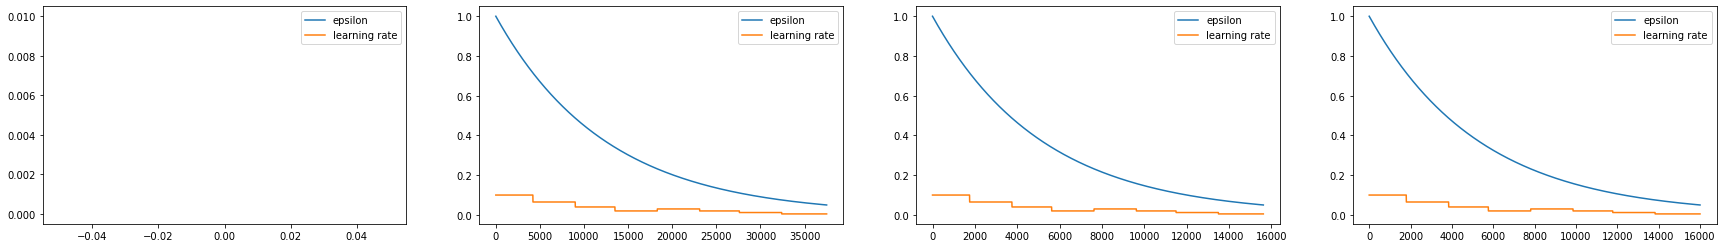

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

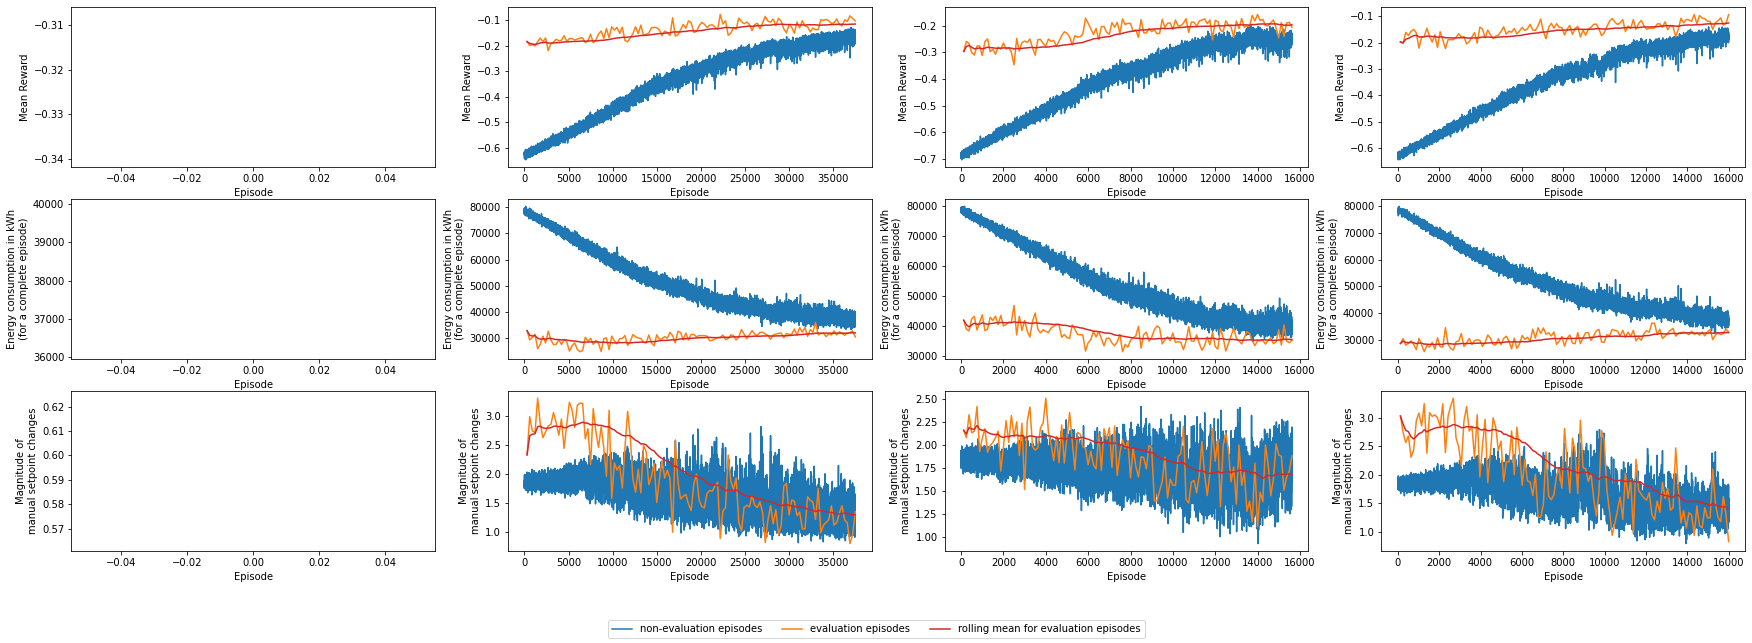

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

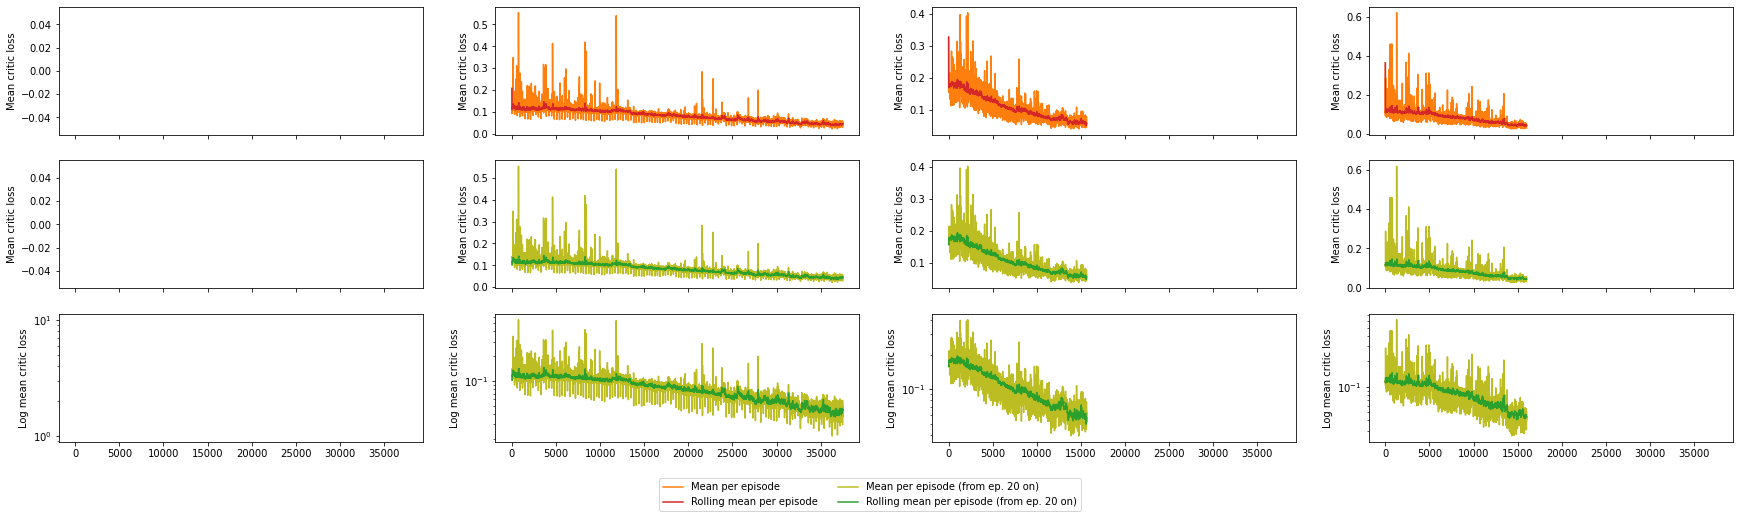

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

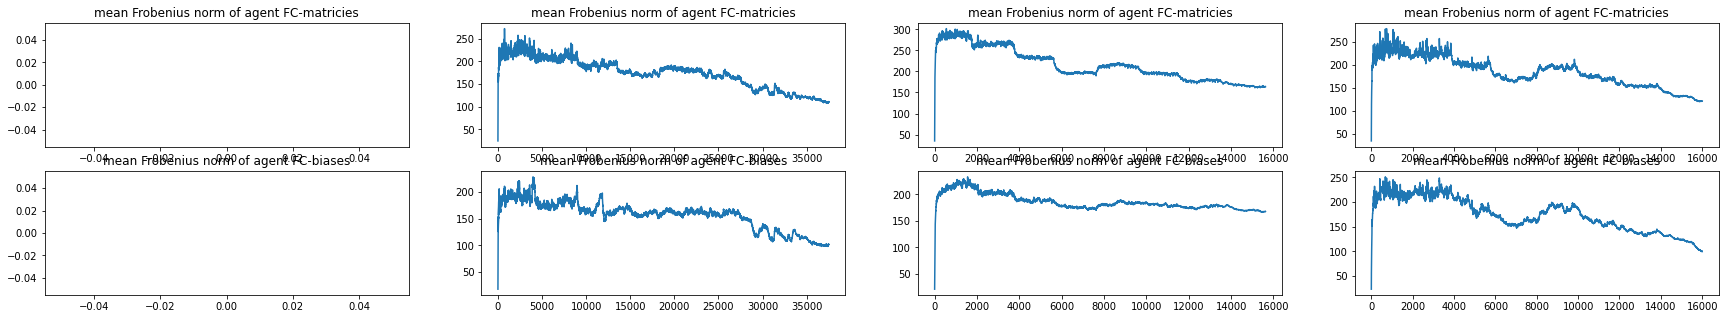

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  37499
Last available evaluation episode for dfs2:  15624
Last available evaluation episode for dfs3:  15999


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 37499: Energy consumption:   30555.40 kWh; Sum of setpoint change magnitudes: 970.5490856844306
For episode 15624: Energy consumption:   35344.07 kWh; Sum of setpoint change magnitudes: 1354.1836720611054
For episode 15999: Energy consumption:   32964.47 kWh; Sum of setpoint change magnitudes: 599.8186407612873

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 37499: Reward: -0.10267 kWh; Setpoint change magnit.:  1.34986; Energy cons.: 42497.07714
... 15624: Reward: -0.20626 kWh; Setpoint change magnit.:  1.88343; Energy cons.: 49157.26693
... 15999: Reward: -0.09393 kWh; Setpoint change magnit.:  0.83424; Energy cons.: 45847.66267


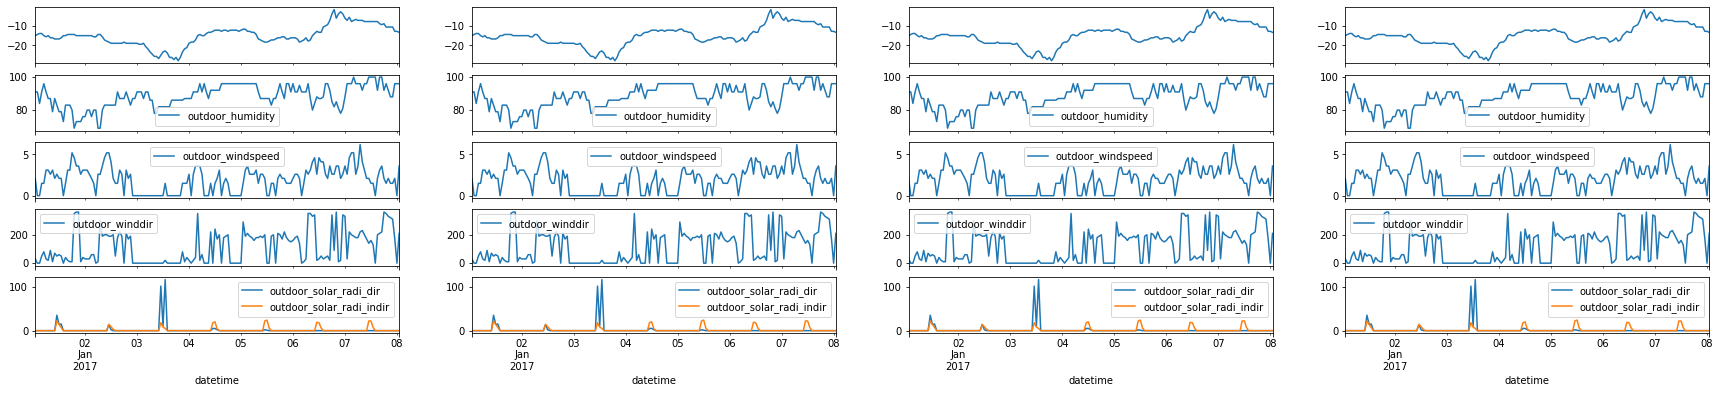

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

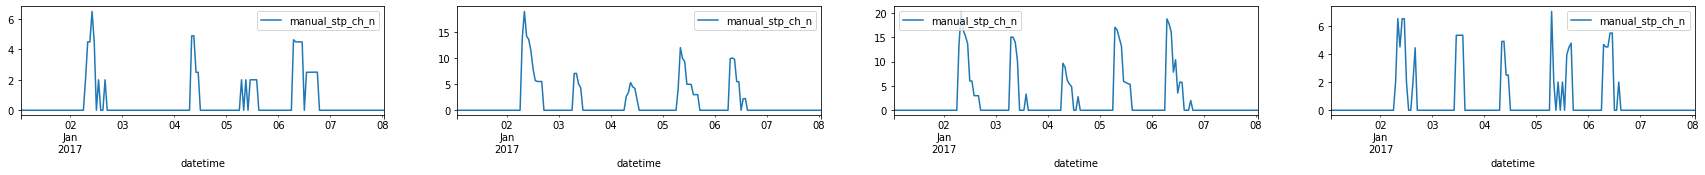

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

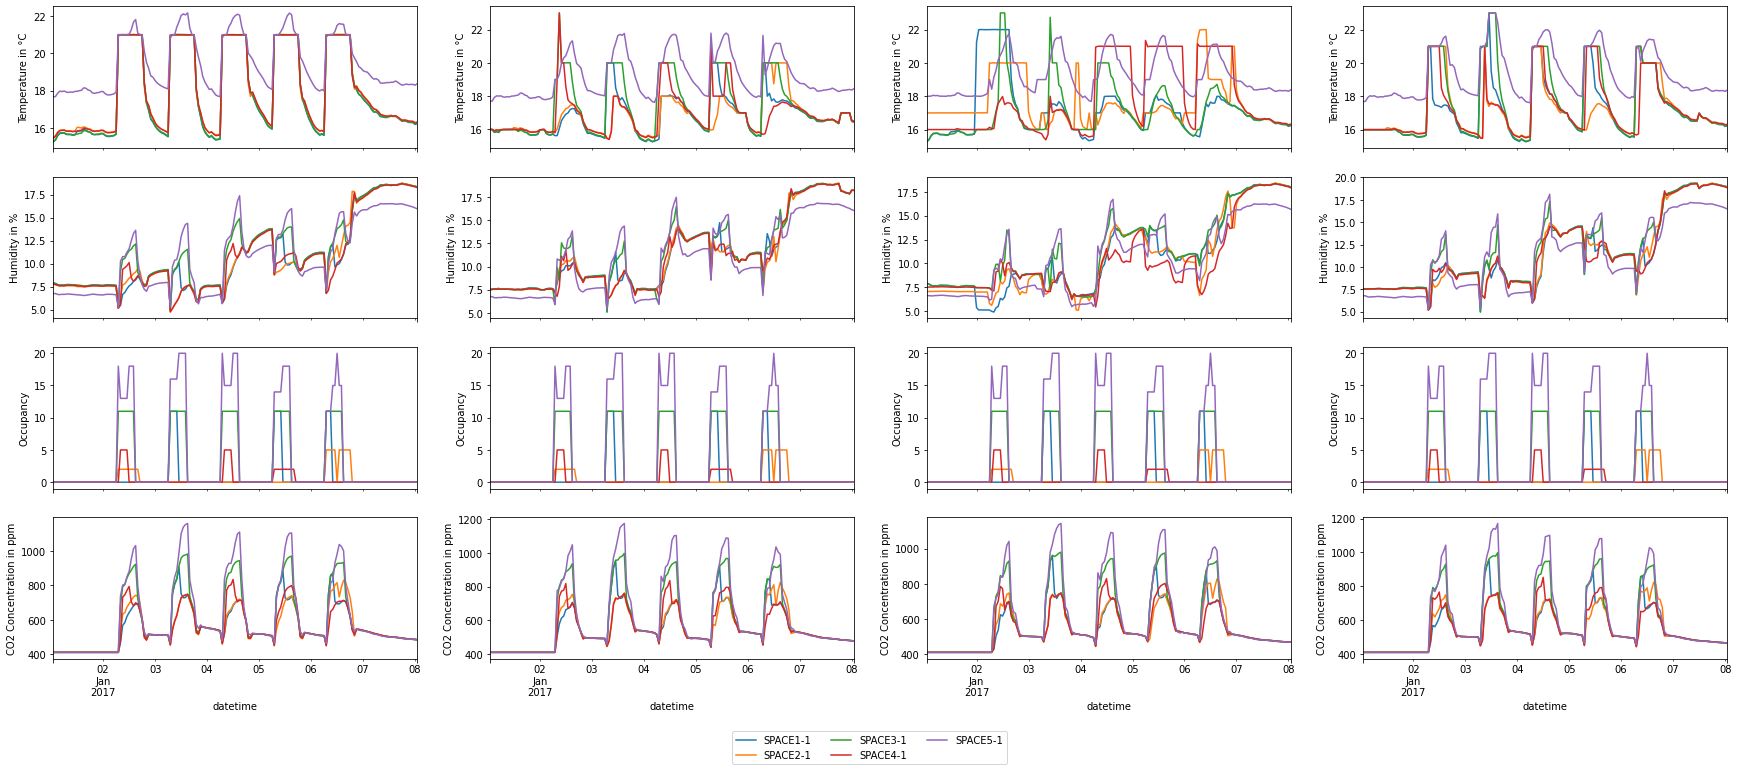

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 



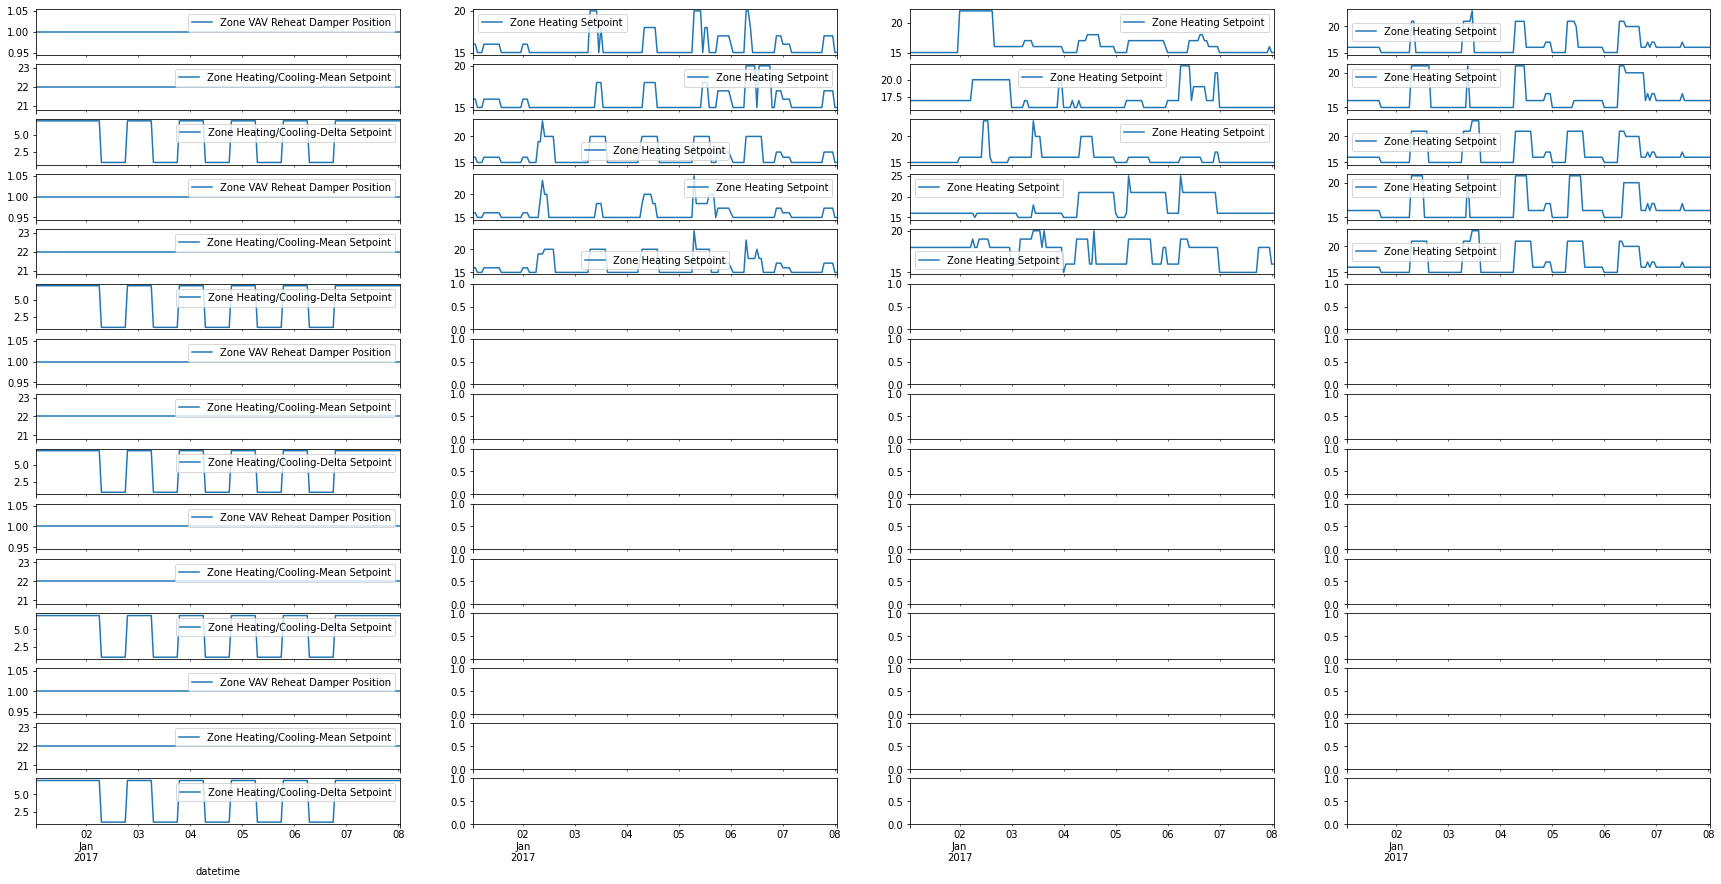

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

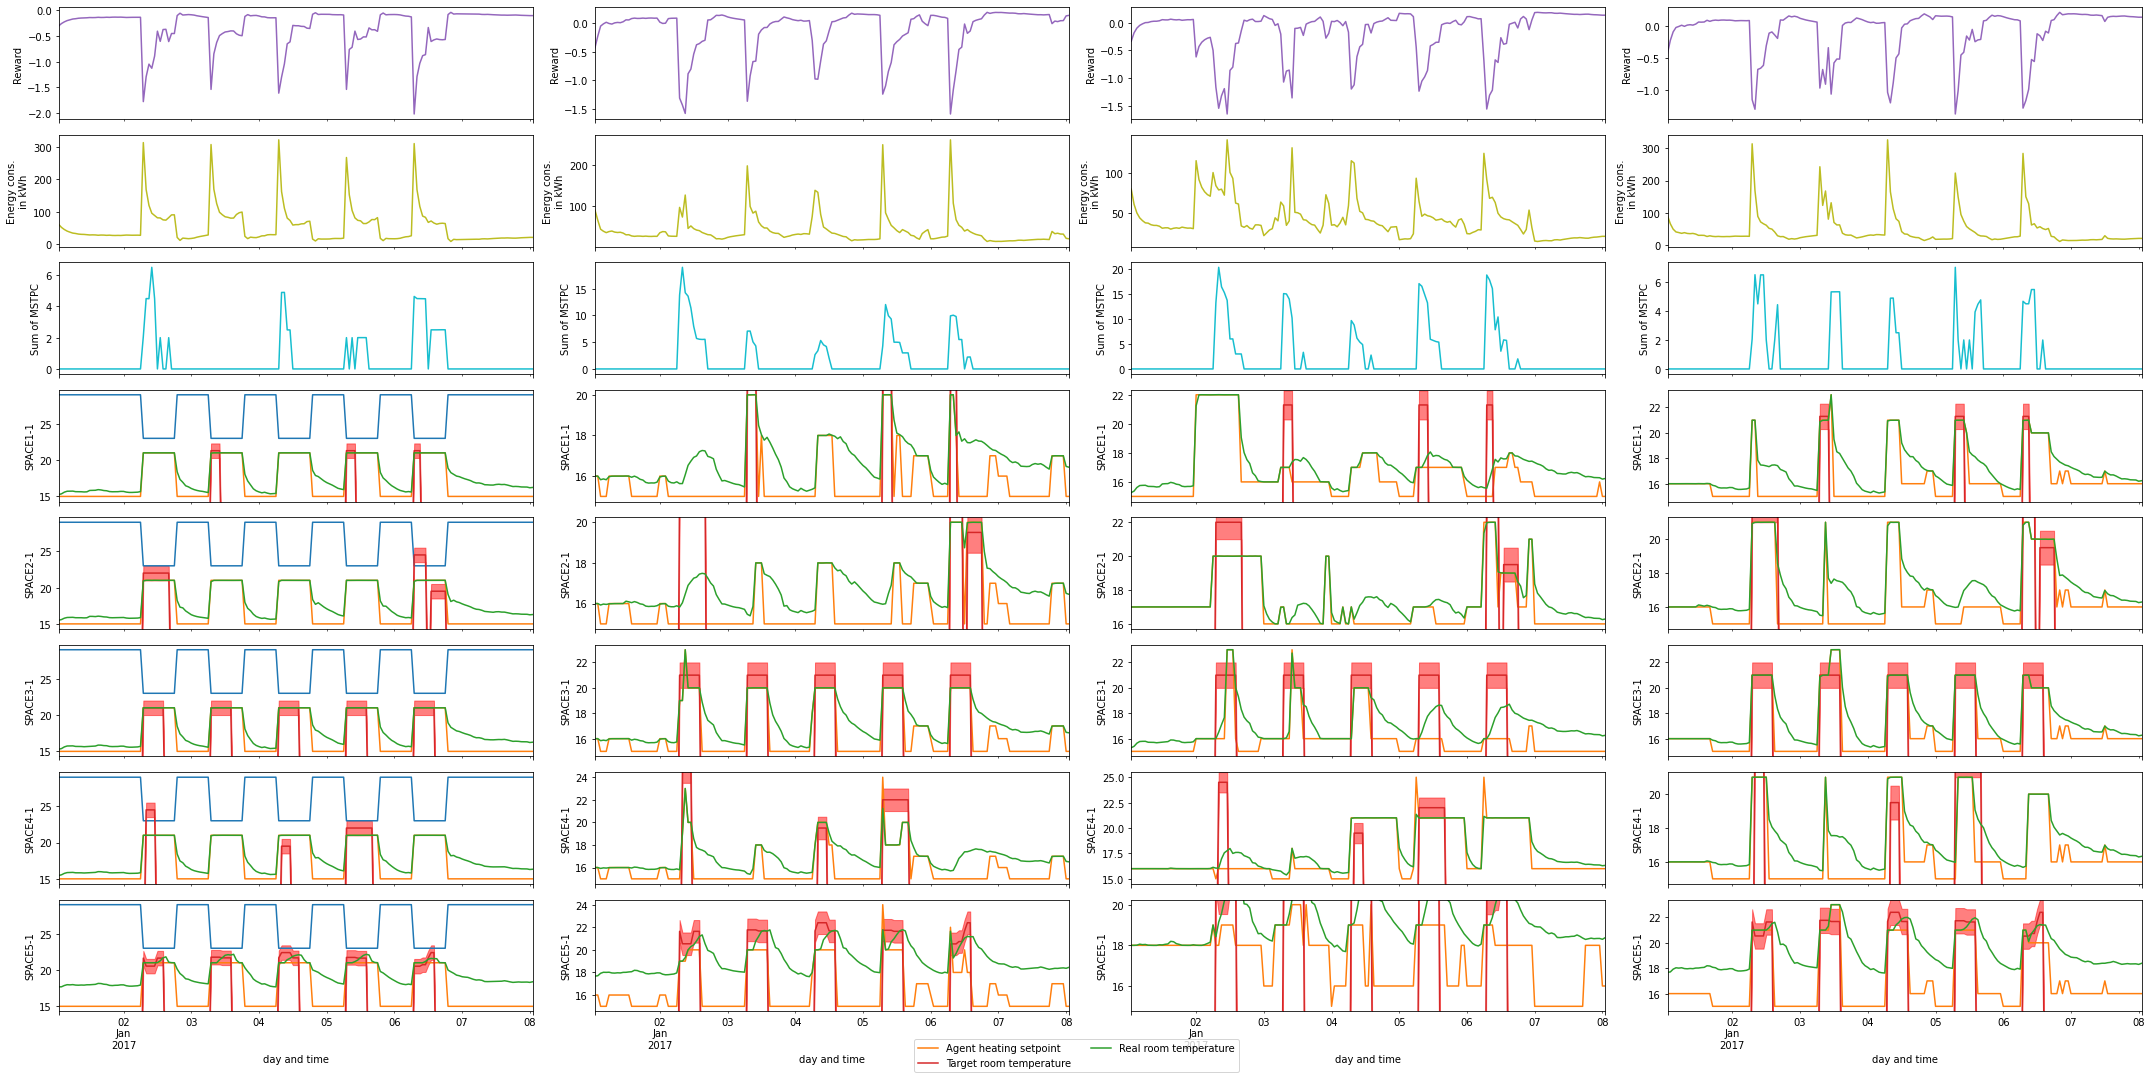

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

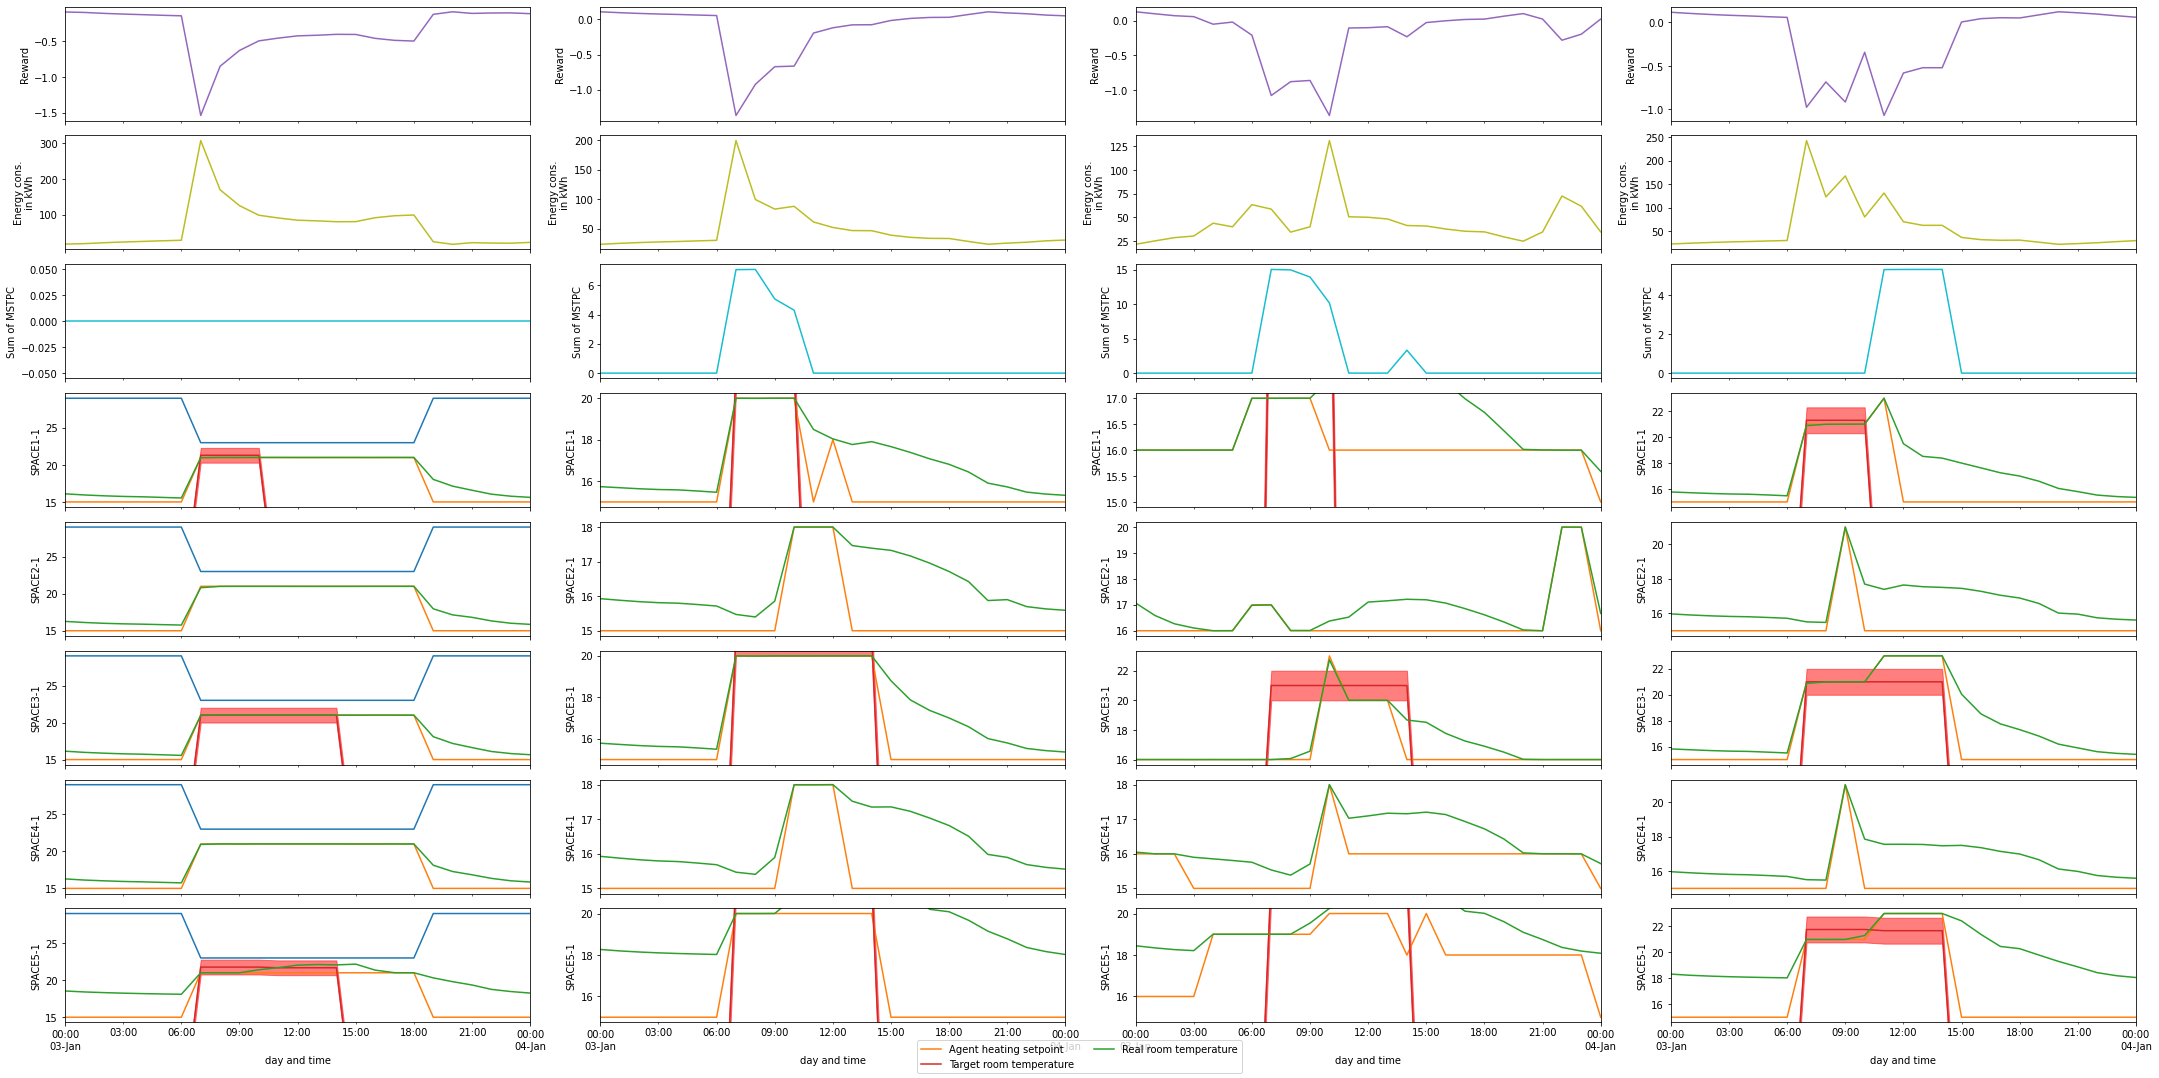

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  41939.6 Wh, mean reward = -0.0951
For plot number 3, mean energy consumption =  48213.2 Wh, mean reward = -0.1946
For plot number 4, mean energy consumption =  45331.5 Wh, mean reward = -0.0878


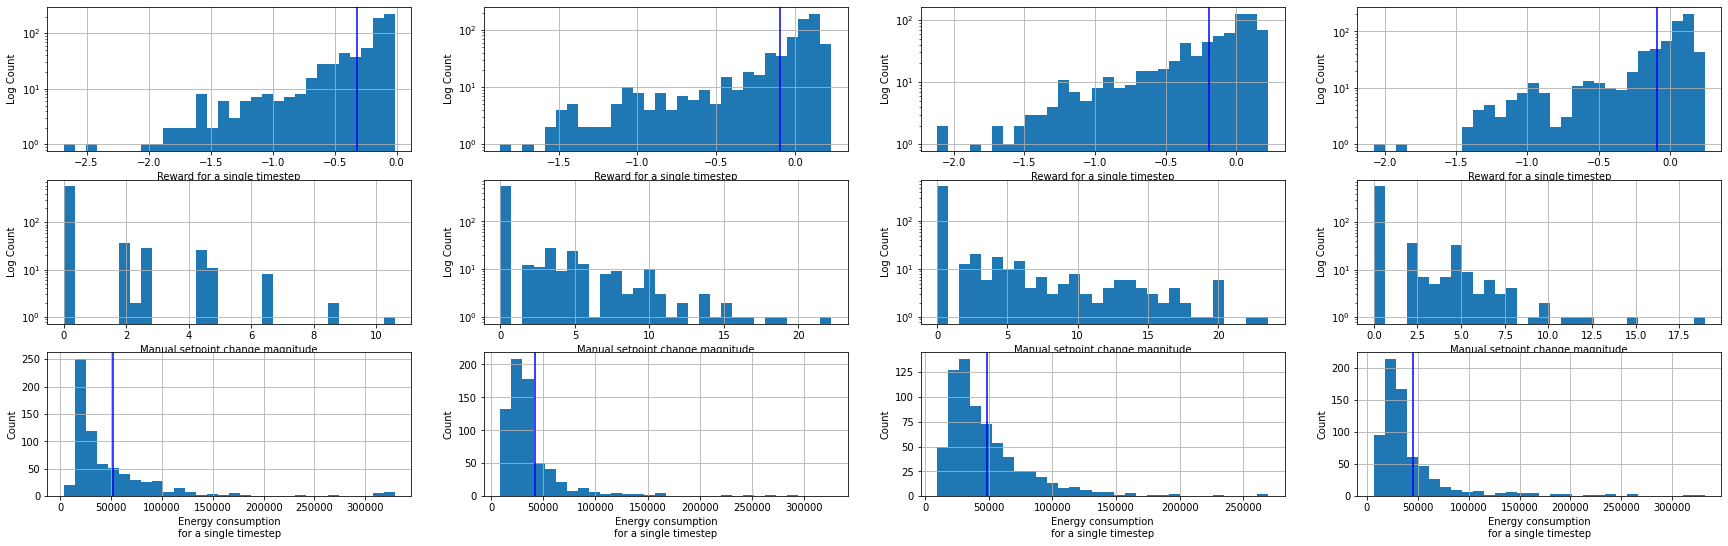

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

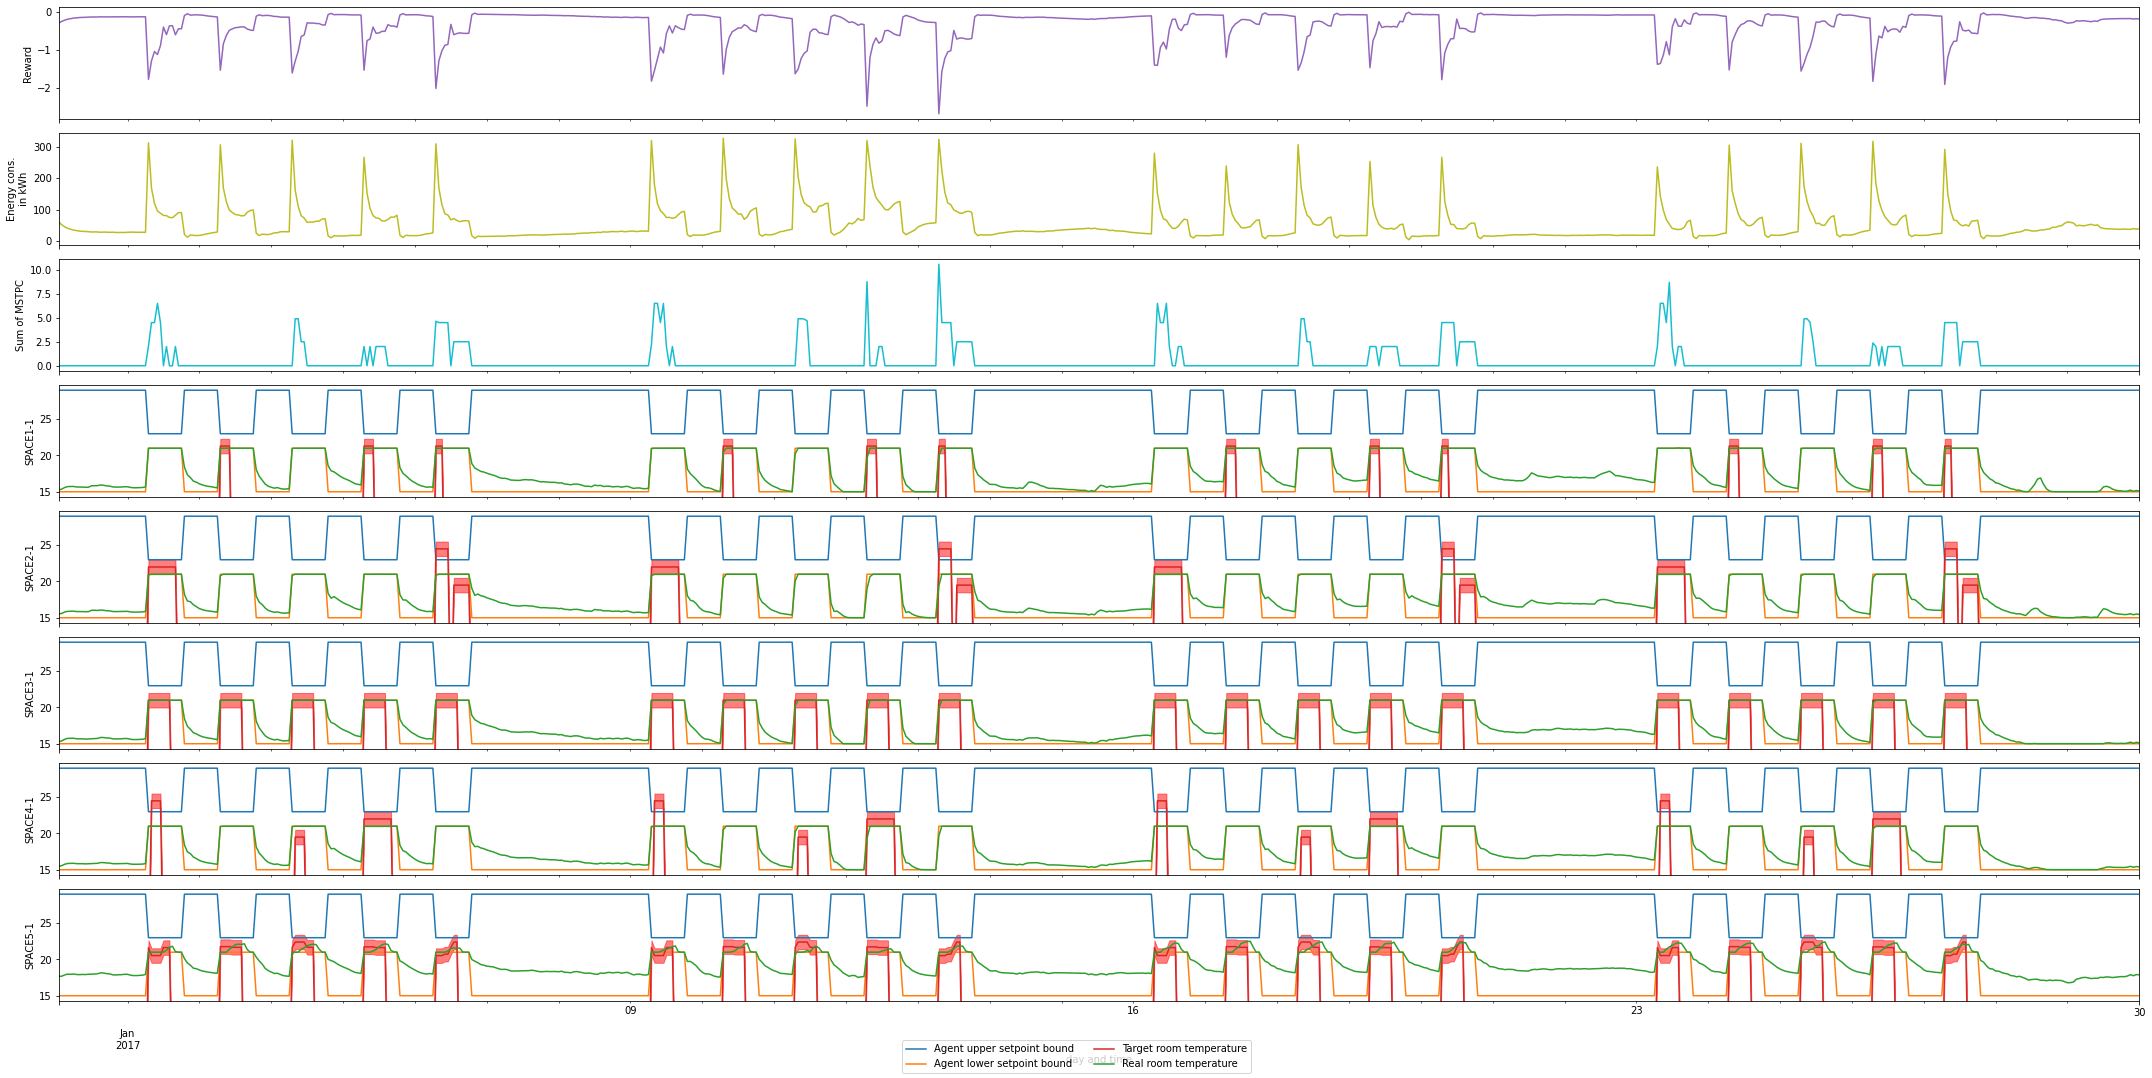

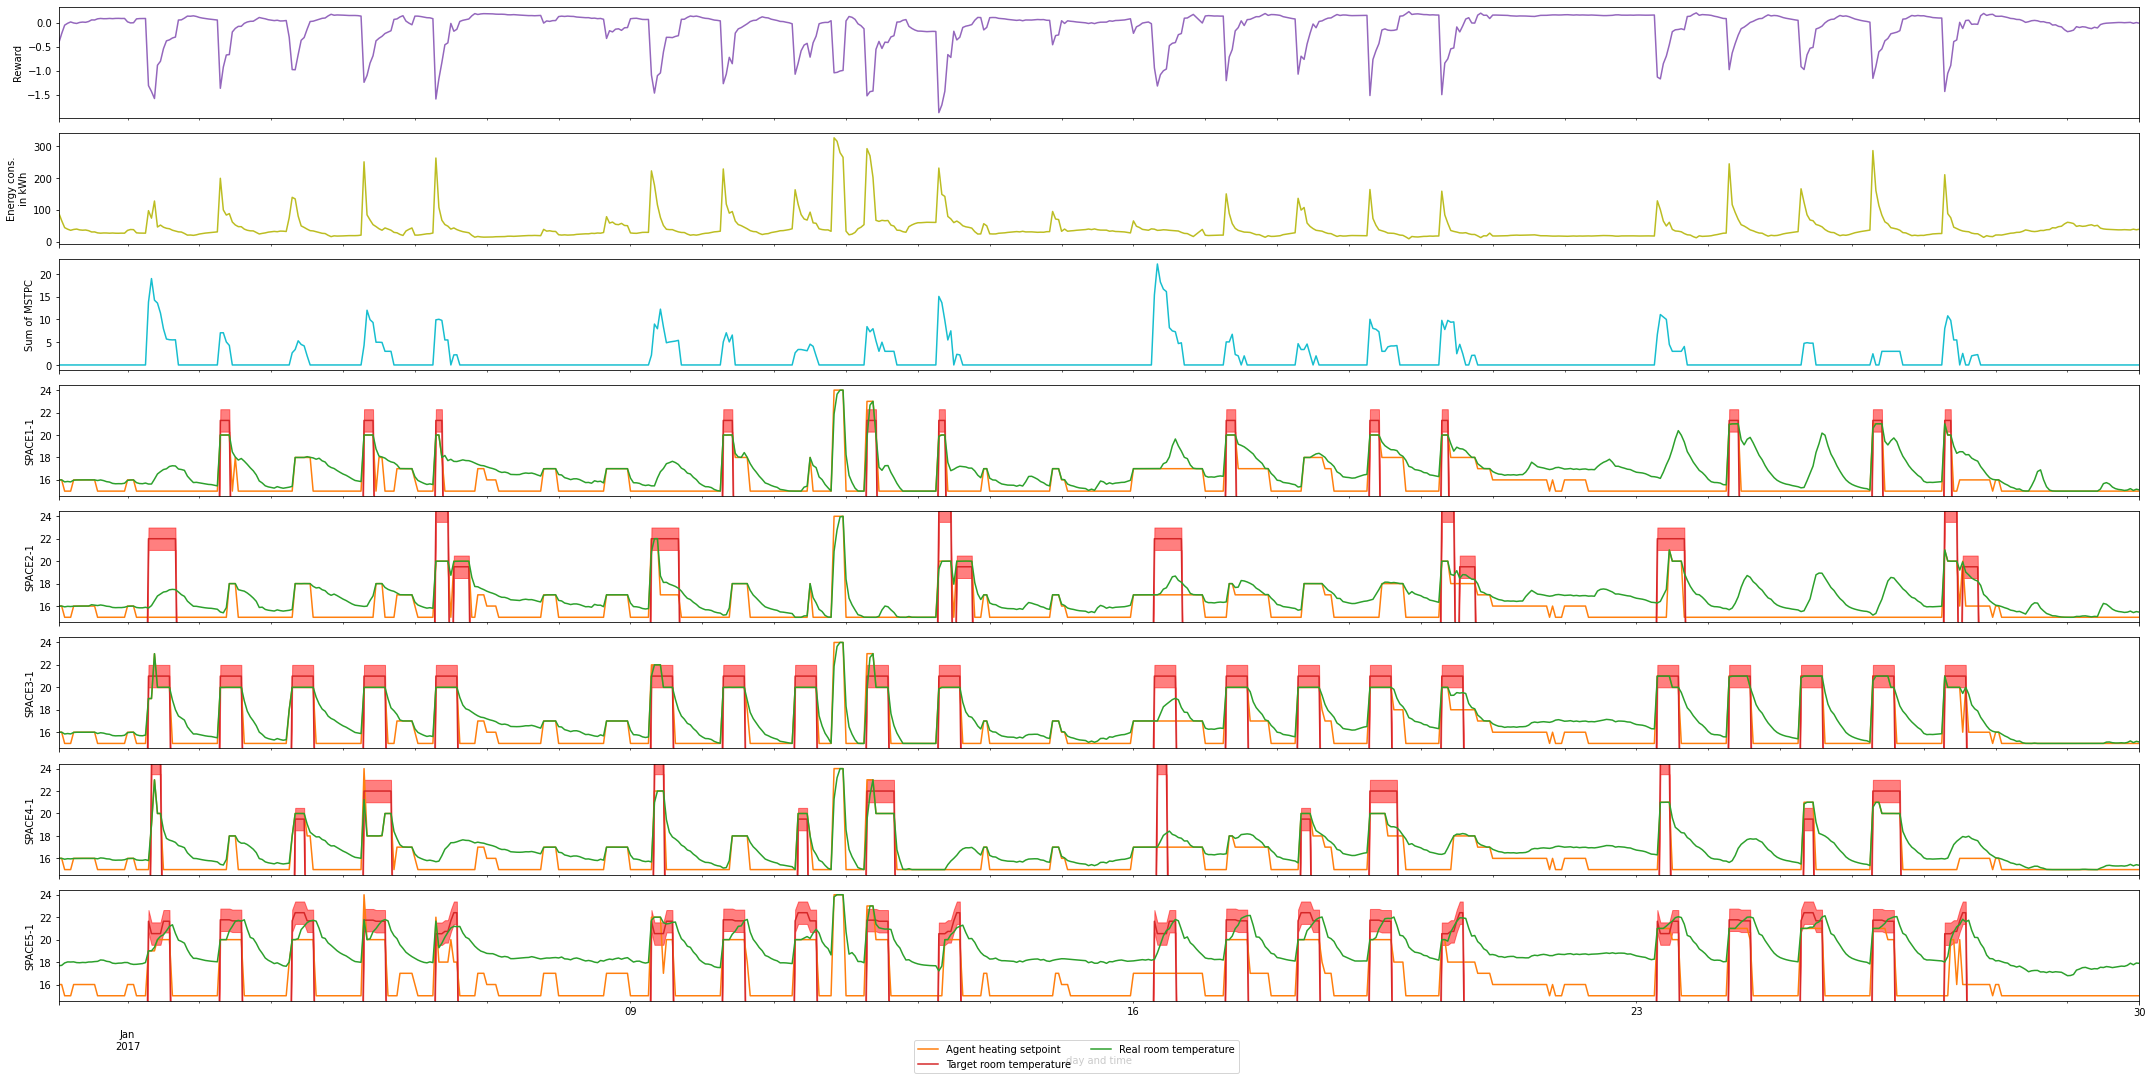

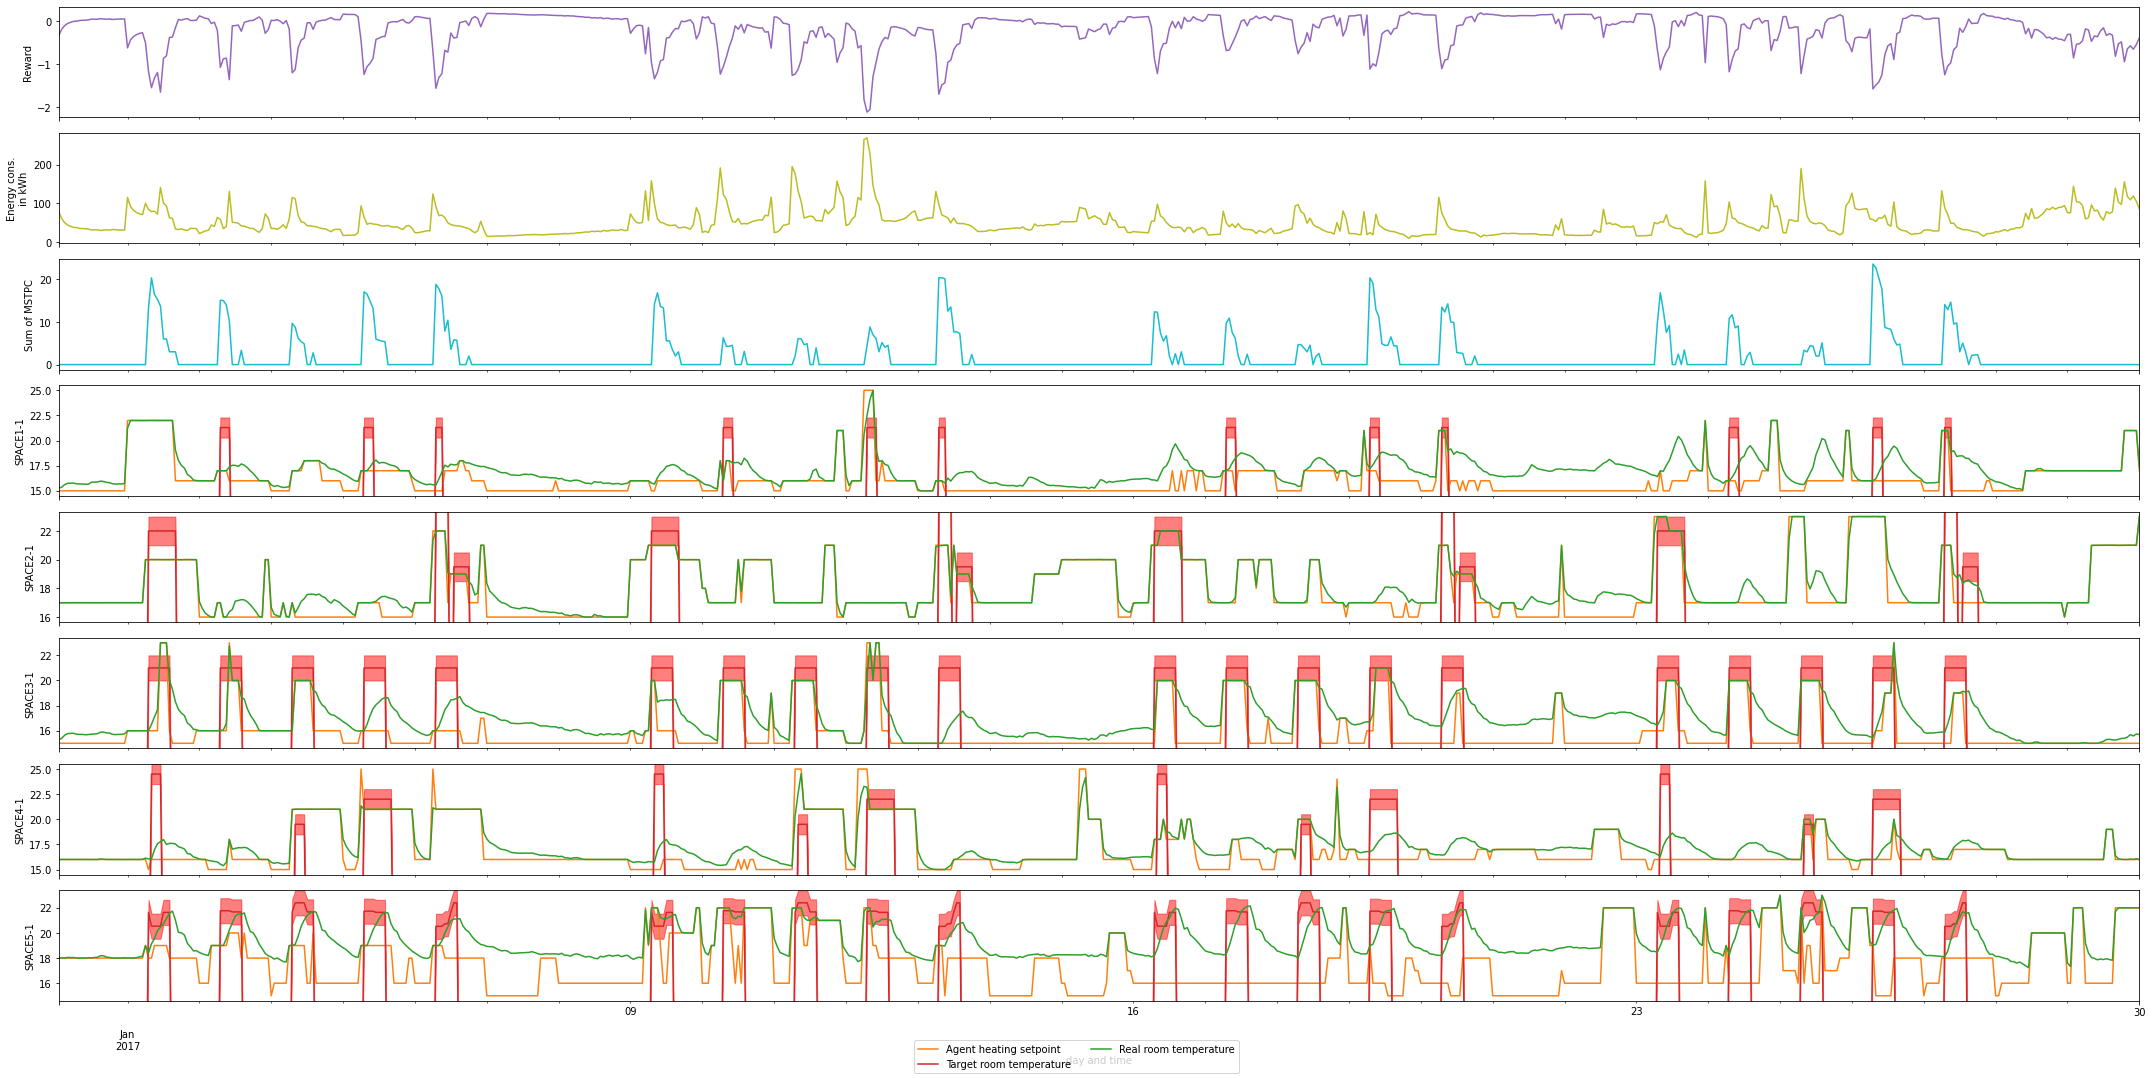

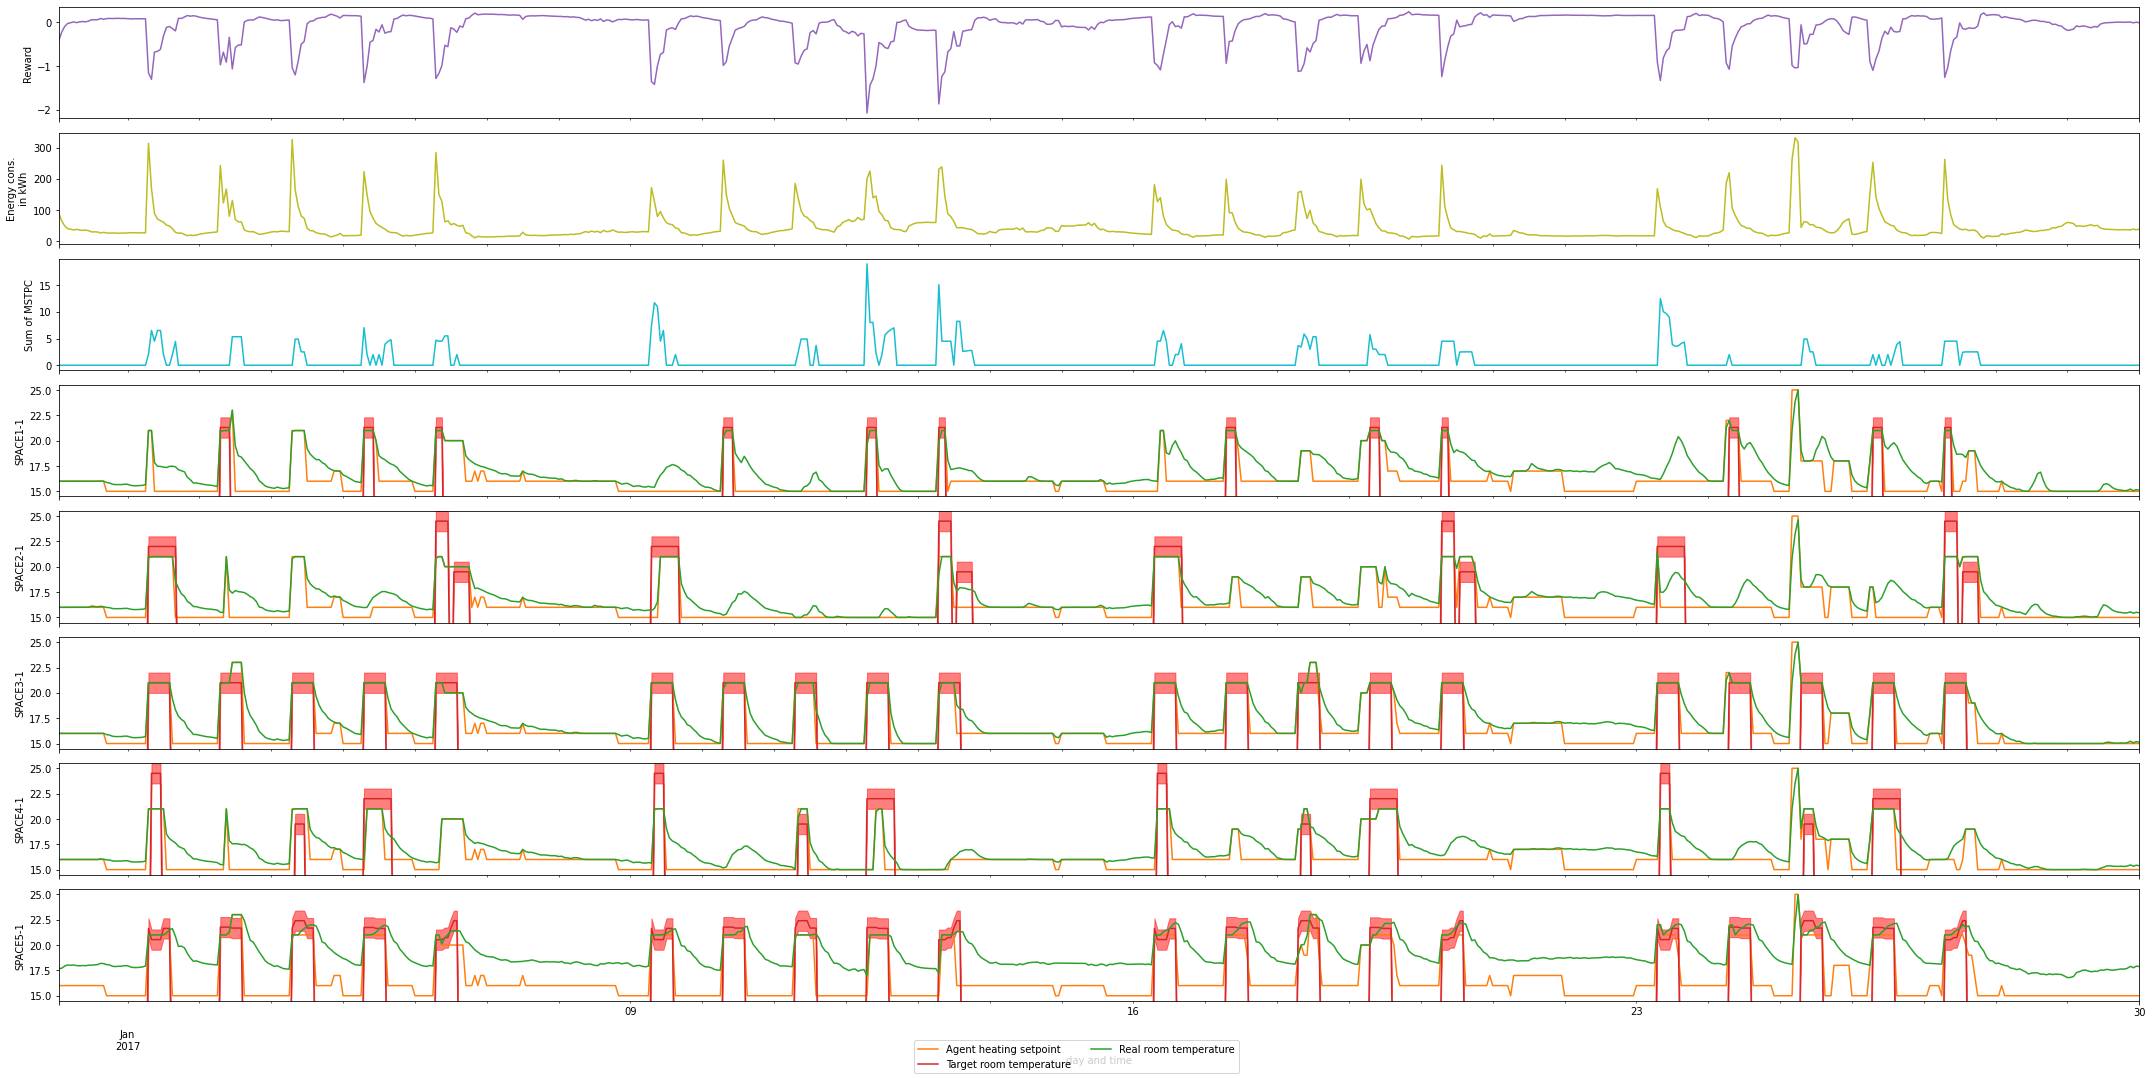

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

(<Figure size 2160x3240 with 30 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s314\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 1: s314\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 1: s314\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 1: s314\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 1: s314\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 2: s314-no-shared\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s314-no-shared\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 2: s314-no-shared\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 2: s314-no-shared\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 2: s314-no-shared\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 3: s314-short\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s314-short\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 3: s314-short\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 3: s314-short\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 3: s314-short\nAgent 4'>],
       dty

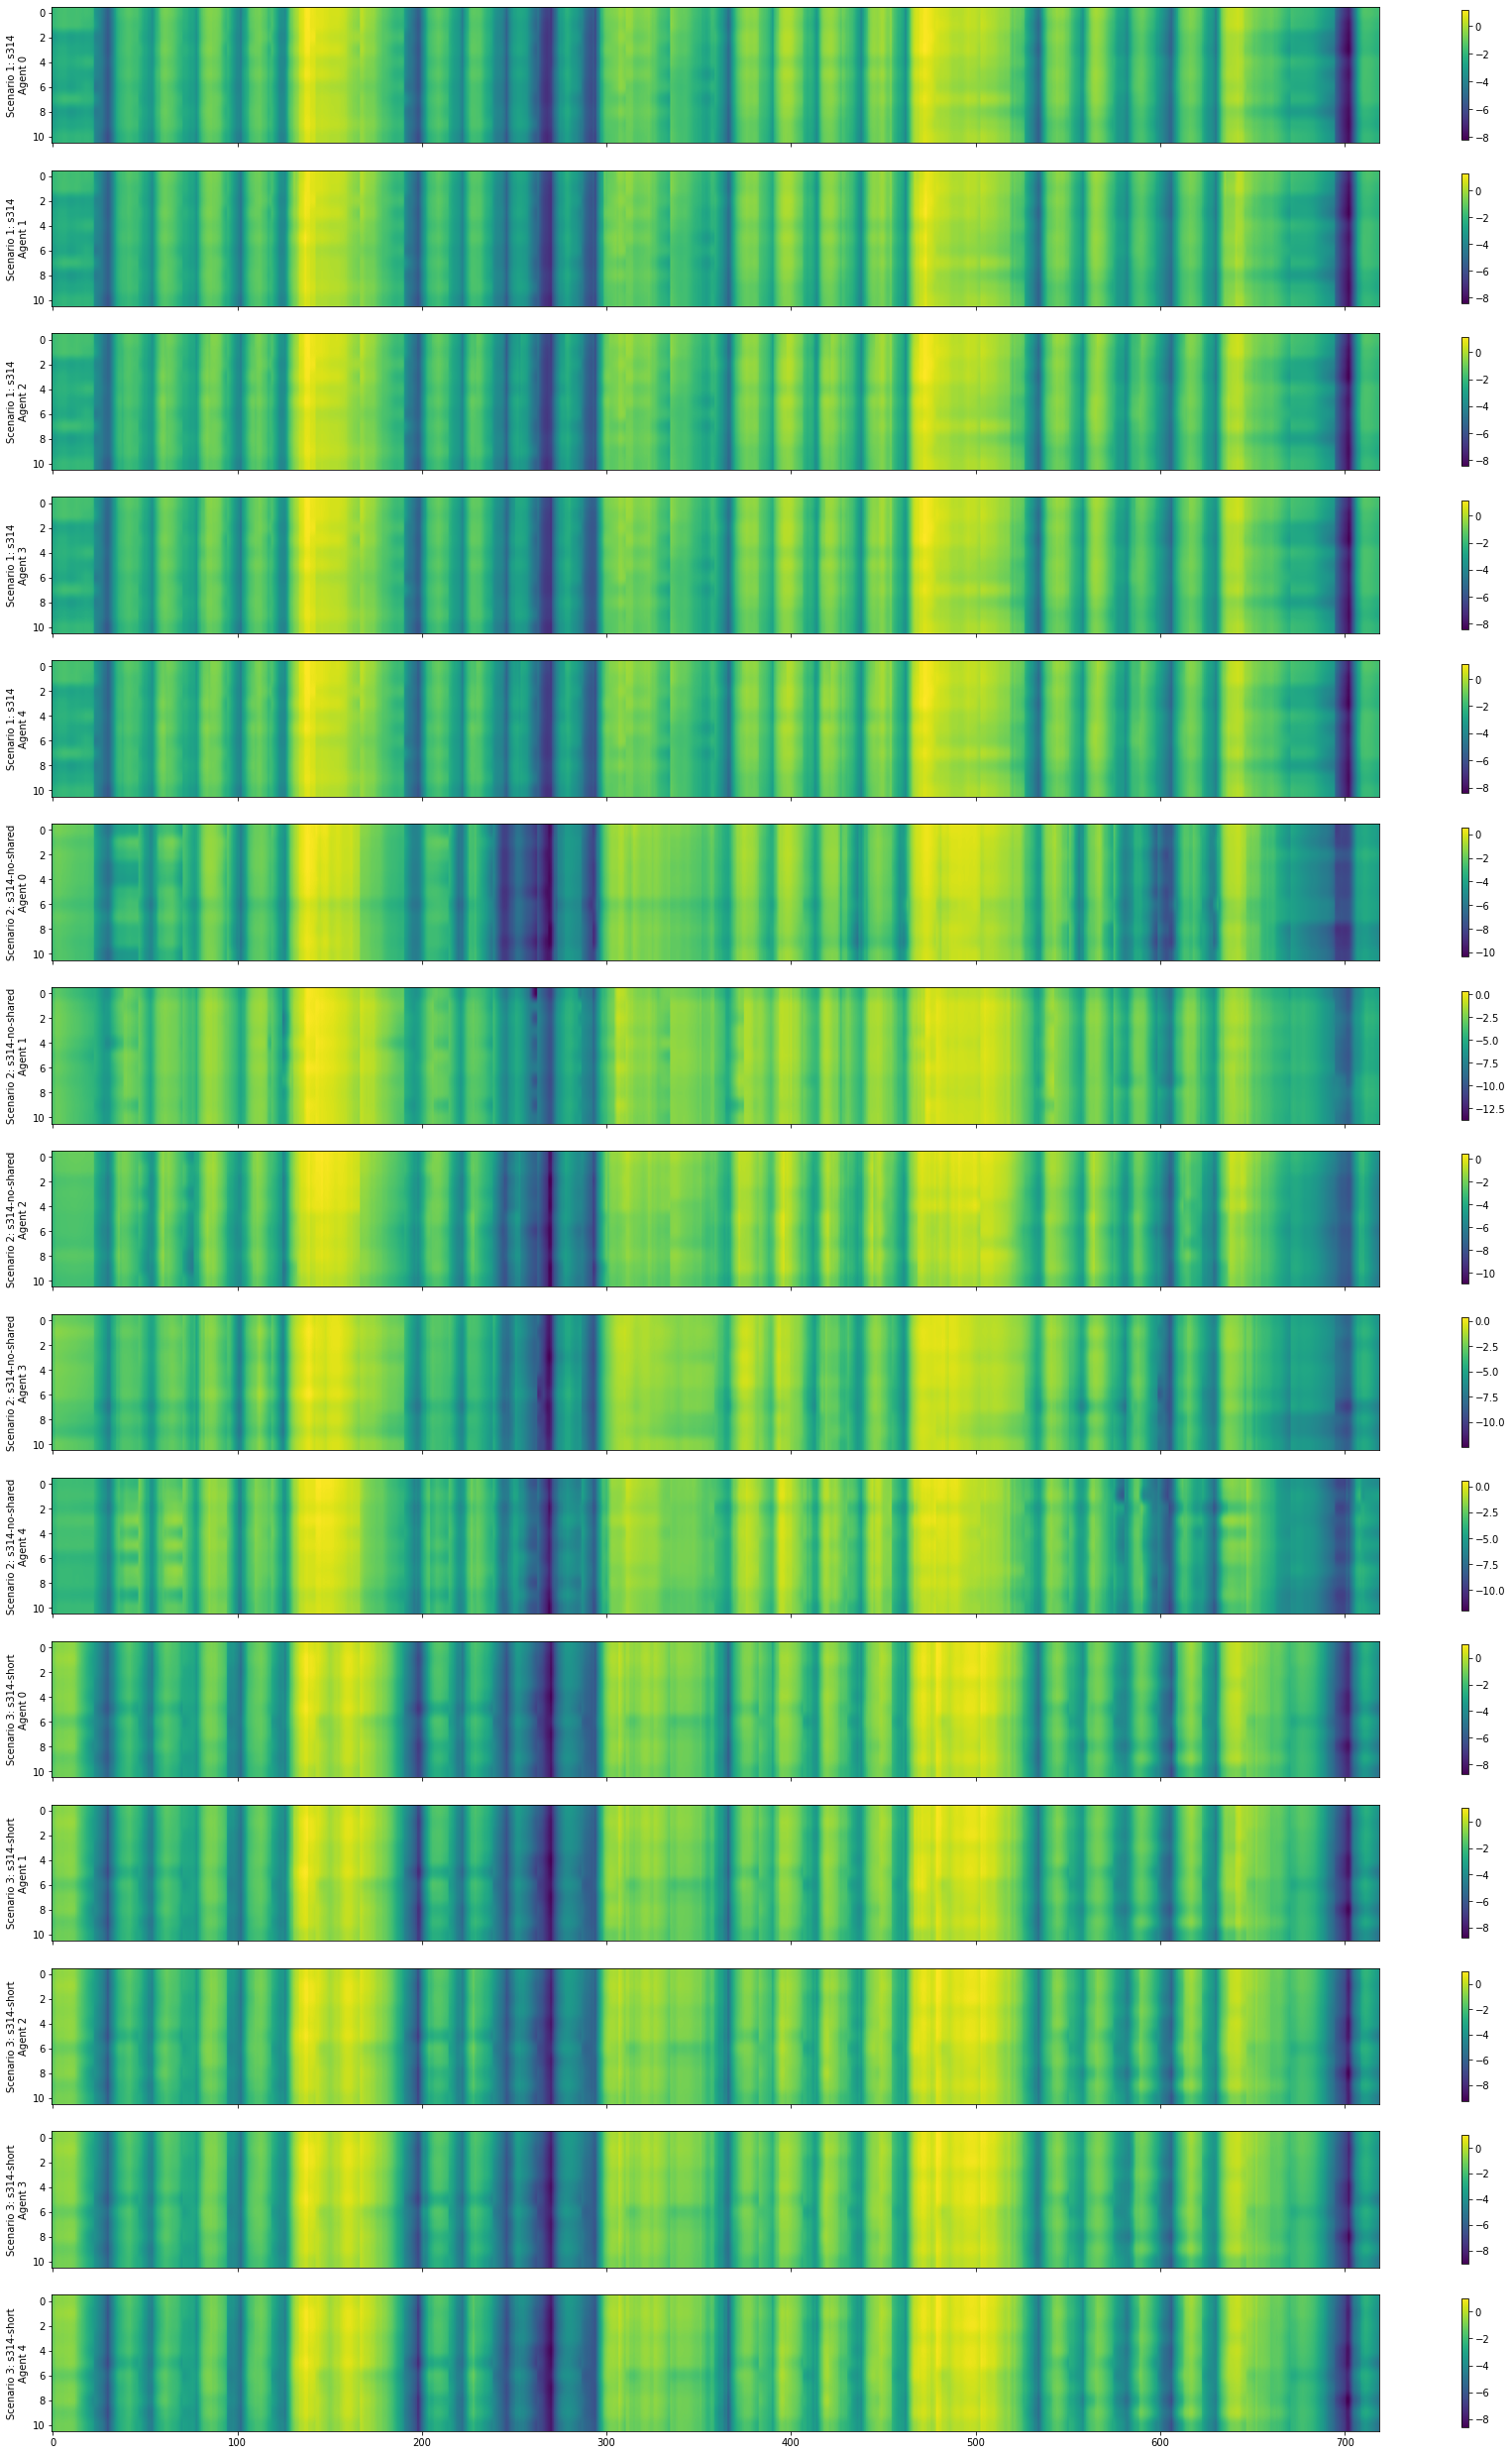

In [33]:
vh.plot_q_values(q_values, fig_width)

Outputs for thesis

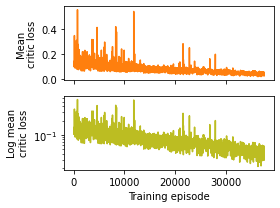

In [34]:
p, _ = vh.export_loss_plot(alldfs[1])
p.tight_layout()
#p.savefig("saved_plots/MA_s302_loss.png")
#p.savefig("saved_plots/MA_s302_loss.pdf")

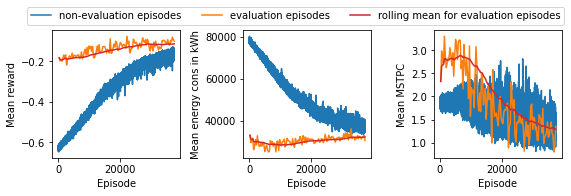

In [35]:
p, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,2.5))
vh.plot_eels_reward(alldfs[1], ax, ylabels=["Mean reward", "Mean energy cons in kWh", "Mean MSTPC"])
p.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
p.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.52,1.1))
#p.savefig("saved_plots/MA_s314_reward.png", bbox_inches="tight")
#p.savefig("saved_plots/MA_s314_reward.pdf", bbox_inches="tight")

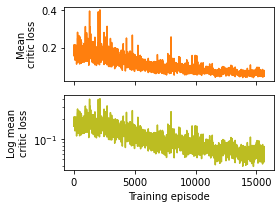

In [36]:
p, _ = vh.export_loss_plot(alldfs[2])
p.tight_layout()
#p.savefig("saved_plots/MA_s302LN_loss.png")
#p.savefig("saved_plots/MA_s302LN_loss.pdf")

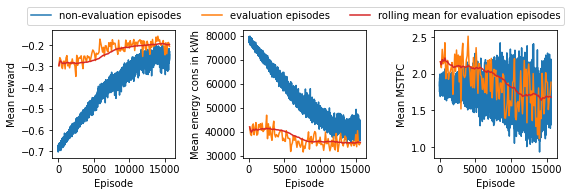

In [43]:
p, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,2.5))
vh.plot_eels_reward(alldfs[2], ax, ylabels=["Mean reward", "Mean energy cons in kWh", "Mean MSTPC"])
p.tight_layout()
handles, labels = ax[0].get_legend_handles_labels()
p.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.52,1.1))
#p.savefig("saved_plots/MA_s314notshared_reward.png", bbox_inches="tight")
#p.savefig("saved_plots/MA_s314notshared_reward.pdf", bbox_inches="tight")

In [38]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [39]:
import matplotlib.lines as mlines

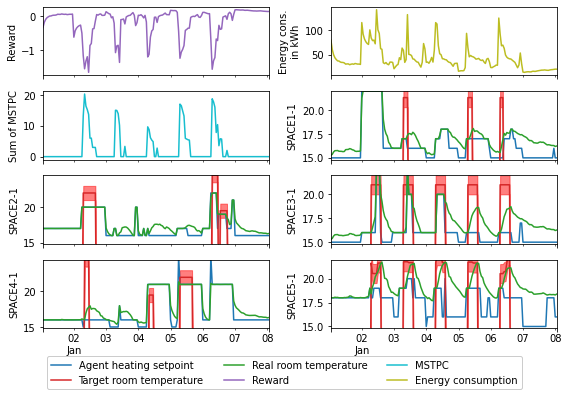

In [40]:
p, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(8,5.5))
_, _ = vh.complete_plot_total_overview(subdfs[2], 8, subdfs_rooms[2], subdfs_agents[2],
                                       fig_height=5, heating_setpoint_color='tab:blue',
                                       framealpha=1, cols_legend=3,
                                       axes=axes.reshape(8,-1))

purple_patch = mlines.Line2D([], [], color='tab:purple', label='Reward', linestyle='-')
cyan_patch   = mlines.Line2D([], [], color='tab:cyan', label='MSTPC', linestyle='-')
olive_patch   = mlines.Line2D([], [], color='tab:olive', label='Energy cons.', linestyle='-')

handles, labels = axes[1,1].get_legend_handles_labels()
handles.append(purple_patch)
labels.append("Reward")
handles.append(cyan_patch)
labels.append("MSTPC")
handles.append(olive_patch)
labels.append("Energy consumption")

axes[2,0].set_ylim((14.8,24.5))
axes[3,0].set_ylim((14.8,24.5))
axes[1,1].set_ylim((14.8,22))
axes[2,1].set_ylim((14.8,22))
axes[3,1].set_ylim((14.8,22))

p.legend(handles, labels, loc='lower center', ncol=3, framealpha=1)
p.tight_layout()
p.show()
#p.savefig("saved_plots/MA_s314_TestWeek_overview.png")
#p.savefig("saved_plots/MA_s314_TestWeek_overview.pdf")